## Carga y visualización del dataset

In [33]:
## Montamos el Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
## Cargamos las librerias que necesitaremos

import matplotlib.pyplot as plt
import pickle
import seaborn as sb
import pandas as pd
import numpy as np

In [35]:
## Cargamos el pkl (path = Mi unidad/DIPLODATOS2023/my_df.pkl)

my_path='Diplodatos/mentoria/DIPLODATOS2023'
with open('/content/drive/MyDrive/'+ my_path +'/my_df.pkl', 'rb') as f:
    df = pickle.load(f)

## Combinacion de datasets

En el TP1 vimos que algunas de las variables presentadas en el dataset original eran redundantes. Por tal motivo, se sugirió generar nuevas columnas que reemplacen la información de estas variables.
1. Expliquen que criterio usaron para seleccionar las nuevas columnas y combinando las columnas restantes del dataset original con las nuevas columnas, presenten el nuevo dataset.
2. Agregar una columna más al dataframe que incluya la integral del hielo en altura. Es decir, una columna que resulte de la suma de la cantidad de hielo en cada nivel.



1.   Se realizo un analisis sobre el comportamiento de la columna de hielo, y se vio que para el objetivo a estudiar no era necesario considerar todos los niveles de hielo dado a que estos podian ser reemplazados por un valor representativo de la columna del dominio.

Mas aun, que no todos los niveles de hielo presentan cantidades relevantes de hielo, por lo que el data set puede ser recortado sin perdida de informacion relevante


In [47]:
## Creo una copia para manipular
df_copy = df.copy()

# Tratamiento de las columnas de hielo para relevarlas solo con un valor representativo del conjunto
Ice_columns = df_copy.columns[10:36]
df_copy.loc[:, 'Ice_values'] = df_copy.loc[:, Ice_columns].values.tolist()
df_copy.loc[:, 'Ice_q75'] = df_copy.Ice_values.apply(np.quantile, args=(0.75,))

2.  

In [48]:
# Anexo de una nueva columna con el valor de la integral sobre todos los niveles de la columna del dominio
df_copy.loc[:, 'Ice_integral'] = df_copy.Ice_values.apply(np.sum)
# Dropeo las columnas inecesarias
df_copy = df_copy.drop(columns = df_copy.columns[:40])
df_copy = df_copy.drop(columns = 'Ice_values')
df_copy[:2]

,CTT,LPI,MDBZ,LIGHT,Ice_q75,Ice_integral
0,219.479904,1.95278,35.446011,2.0,1.374226e-03,2.108538e-02
1,302.756256,0.00000,-30.000000,0.0,8.517672e-12,3.672939e-09


## PCA

3. Partiendo del nuevo dataset, que no debería tener más de 10 columnas, hagan un análisis de componentes principales (PCA). ¿Es necesario estandarizar o escalar los datos?
4. Haciendo uso de "components_" pueden ver que coeficientes se asocian a cada componente principal para cada variable. ¿Pueden explicar los resultados aquí obtenidos?
5. Grafiquen la varianza explicada por cada una de las componentes obtenidas.
6. Dados los resultados obtenidos, ¿cuál creen ustedes que es el número óptimo de componentes principales que podrían sumar al dataset?



3.   Para asegurarnos de que ninguna columna tenga mas peso que otra, inicialmente vamos a normalizar los valores del dataset para que todas las columnas esten en las mismas unidades



In [37]:
# Primero normalizo los valores en el data frame
df_copy = (df_copy - df_copy.mean())/df_copy.std()



4.    El atributo `components_` nos devuelve una lista de *NxM* dimensiones donde *N* es la nueva dimension sobre la que se mapea el conjunto de datos y *M* son la cantidad de columnas del dataset. Una forma de interpretarlo es considerar que `components_` nos devuelve *M* vectores de dimension *N* donde cada vector esta ordenado segun el nivel de varianza de los datos originales.



In [38]:
from sklearn.decomposition import PCA

n_components = 6

pca = PCA(n_components=n_components)
pca.fit(df_copy)

pca.components_

array([[-0.33314044,  0.34126558,  0.46102668,  0.26113017,  0.4965175 ,
         0.49526867],
       [ 0.68429494,  0.39662232, -0.34676733,  0.46881566,  0.13038038,
         0.13189551],
       [-0.19146864, -0.51339705,  0.04545648,  0.81667454, -0.13029613,
        -0.11731391],
       [-0.41960396,  0.67725346, -0.06898765,  0.21084406, -0.3892991 ,
        -0.40557609],
       [ 0.45609267,  0.06183035,  0.81263733,  0.02413324, -0.25063531,
        -0.25372541],
       [-0.00310289,  0.01252072,  0.00134311, -0.00528973, -0.71071964,
         0.70333592]])



5.  



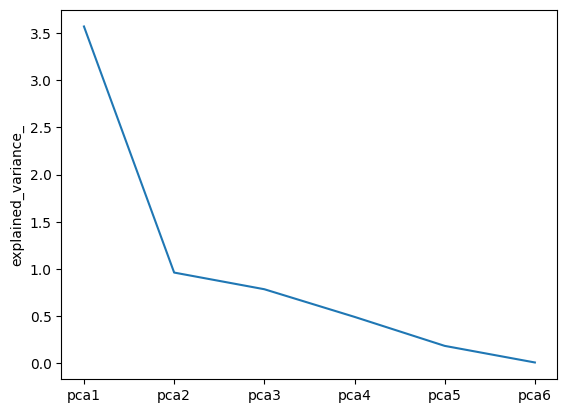

In [50]:
# Creo una lista para los nombres de las componentes, asi se visualizan de mejor manera en el plot

def pca_columns(n:int) -> str:
  '''
  Funcion auxiliar para crear una lista que contenga
  los nombres de cada componente de una PCA
  '''
  columns = []
  for idx in range(1,n+1):
    columns.append('pca' + str(idx))
  return columns

columns = pca_columns(n_components)

plt.plot(pca.explained_variance_)
plt.xticks(range(n_components), labels=columns)
plt.ylabel('explained_variance_')
plt.show()

6.    Analizando los resultados del inciso 5, se puede ver que la dimension optima sobre la cual proyectar el conjunto de datos es de 3 componentes, se podria argumentar una cuarta pero mas componentes no realiza una aportacion significativa de informacion. Por lo que añadir al data set 3 columnas con las componentes principales se consideraria la aportacion optima.